In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab01.ipynb")

# Lab 01

Welcome to the first lab of Data 100! This lab is meant to help you familiarize yourself with JupyterHub, review Python and `numpy`, and introduce you to `matplotlib`, a Python visualization library. 

### Lab Walk-Through

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("PS7lPZUnNBo", list = 'PLQCcNQgUcDfrhStFqvgpvLNhOS43bnSQq', listType = 'playlist')

---
## Part 1: Jupyter Tips


### Viewing Documentation

To output the documentation for a function, use the `help` function.

In [ ]:
# help(print)
?print

You can also use Jupyter to view function documentation inside your notebook. The function must already be defined in the kernel for this to work.

Below, click your mouse anywhere on the `print` block below and use `Shift` + `Tab` to view the function's documentation. 

### Importing Libraries and Magic Commands

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

`%matplotlib inline` is a [Jupyter magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) that configures the notebook so that Matplotlib displays any plots that you draw directly in the notebook rather than to a file, allowing you to view the plots upon executing your code. (Note: In practice, this is no longer necessary, but we're showing it to you now anyway.)

Another useful magic command is `%%time`, which times the execution of that cell. You can use this by writing it as the first line of a cell. (Note that `%%` is used for *cell magic commands* that apply to the entire cell, whereas `%` is used for *line magic commands* that only apply to a single line.)

In [6]:
%%time

lst = []
for i in range(100):
    lst.append(i)

CPU times: total: 0 ns
Wall time: 0 ns


### Keyboard Shortcuts
To learn about keyboard shortcuts, go to **Help --> Keyboard Shortcuts** in the menu above. 

Here are a few that we like:
1. `Ctrl` + `Return` (or `Cmd` + `Return` on Mac): *Evaluate the current cell*
2. `Shift` + `Return`: *Evaluate the current cell and move to the next*
3. `ESC` : *command mode* (may need to press before using any of the commands below)
4. `a` : *create a cell above*
5. `b` : *create a cell below*
6. `dd` : *delete a cell*
7. `z` : *undo the last cell operation*
8. `m` : *convert a cell to markdown*
9. `y` : *convert a cell to code*

---
## Part 2: Prerequisites


### Python

Python is the main programming language we'll use in the course. We expect that you've taken CS 61A, Data 8, or an equivalent class, so we will not be covering general Python syntax. If any of the following exercises are challenging (or if you would like to refresh your Python knowledge), please review one or more of the following materials.

- **[Python Tutorial](https://docs.python.org/3.8/tutorial/)**: Introduction to Python from the creators of Python.
- **[Composing Programs Chapter 1](http://composingprograms.com/pages/11-getting-started.html)**: This is more of a introduction to programming with Python.
- **[Advanced Crash Course](http://cs231n.github.io/python-numpy-tutorial/)**: A fast crash course which assumes some programming background.

### NumPy

NumPy is the numerical computing module introduced in Data 8, which is a prerequisite for this course. Here's a quick recap of NumPy. For more review, read the following materials.

- **[NumPy Quick Start Tutorial](https://numpy.org/doc/stable/user/quickstart.html)**
- **[DS100 NumPy Review](http://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html)**
- **[Stanford CS231n NumPy Tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy)**
- **[The Data 8 Textbook Chapter on NumPy](https://www.inferentialthinking.com/chapters/05/1/Arrays)**

### Question 1

The core of NumPy is the array. Like Python lists, arrays store data; however, they store data in a more efficient manner. In many cases, this allows for faster computation and data manipulation.

In Data 8, we used `make_array` from the `datascience` module, but that's not the most typical way. Instead, use `np.array` to create an array. It takes a sequence, such as a list or range. 

Below, create an array `arr` containing the values 1, 2, 3, 4, and 5 (in that order).

<!--
BEGIN QUESTION
name: q1
points: 1
-->

In [8]:
arr = np.array([1,2,3,4,5])

In [9]:
grader.check("q1")

q1 results: All test cases passed!

In addition to values in the array, we can access attributes such as shape and data type. A full list of attributes can be found [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.ndarray.html#array-attributes).

In [10]:
arr[3]

np.int64(4)

In [11]:
arr[2:4] # 左闭右开

array([3, 4])

In [12]:
arr.shape # 一维长度为5

(5,)

In [13]:
arr.dtype

dtype('int64')

Arrays, unlike Python lists, cannot store items of different data types.

In [14]:
# A regular Python list can store items of different data types
[1, '3']

[1, '3']

In [15]:
# Arrays will convert everything to the same data type
np.array([1, '3'])

array(['1', '3'], dtype='<U21')

In [16]:
# Another example of array type conversion
np.array([5, 8.3])

array([5. , 8.3])

Arrays are also useful in performing *vectorized operations*. Given two or more arrays of equal length, arithmetic will perform element-wise computations across the arrays. 

For example, observe the following:

In [17]:
# Python list addition will concatenate the two lists
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [18]:
# NumPy array addition will add them element-wise
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

### Question 2

#### Question 2a

Write a function `summation` that evaluates the following summation for $n \geq 1$:

$$\sum_{i=1}^{n} i^3 + 3 i^2$$

**Note**: You should not use `for` loops in your solution. Check the [NumPy documentation](https://numpy.org/doc/1.19/reference/index.html). If you're stuck, try a search engine! Searching the web for examples of how to use modules is very common in data science.

<!--
BEGIN QUESTION
name: q2a
points: 1
-->

In [19]:
# 用好np向量化

def summation(n):
    """Compute the summation i^3 + 3 * i^2 for 1 <= i <= n."""
    arr = np.arange(1, n+1)
    newArr = arr**3 + 3 * arr**2
    return int(np.sum(newArr))

In [20]:
grader.check("q2a")

q2a results: All test cases passed!

#### Question 2b

Write a function `elementwise_array_sum` that computes the square of each value in `list_1`, the cube of each value in `list_2`, then returns a list containing the element-wise sum of these results. Assume that `list_1` and `list_2` have the same number of elements, do not use for loops.

The input parameters will both be **python lists**, so you may need to convert the lists into arrays before performing your operations. The output should be a **numpy array.**



<!--
BEGIN QUESTION
name: q2b
points: 1
-->

In [21]:
def elementwise_array_sum(list_1, list_2):
    """Compute x^2 + y^3 for each x, y in list_1, list_2. 
    
    Assume list_1 and list_2 have the same length.
    
    Return a NumPy array.
    """
    assert len(list_1) == len(list_2), "both args must have the same number of elements"
    # create a NumPy array from the two lists
    arr1 = np.array(list_1)
    arr2 = np.array(list_2)

    arr_sum = arr1 ** 2 + arr2 ** 3
    return arr_sum

In [22]:
grader.check("q2b")

q2b results: All test cases passed!

You might have been told that Python is slow, but array arithmetic is carried out very fast, even for large arrays. Below is an implementation of the above code that does not use NumPy arrays.

In [23]:
def elementwise_list_sum(list_1, list_2):
    """Compute x^2 + y^3 for each x, y in list_1, list_2. 
    
    Assume list_1 and list_2 have the same length.
    """

    return [x ** 2 + y ** 3 for x, y in zip(list_1, list_2)]

For ten numbers, `elementwise_list_sum` and `elementwise_array_sum` both take a similar amount of time.

In [24]:
sample_list_1 = list(range(10))
sample_array_1 = np.arange(10)

In [25]:
%%time
elementwise_list_sum(sample_list_1, sample_list_1)

CPU times: total: 0 ns
Wall time: 0 ns


[0, 2, 12, 36, 80, 150, 252, 392, 576, 810]

In [26]:
%%time
elementwise_array_sum(sample_array_1, sample_array_1)

CPU times: total: 0 ns
Wall time: 0 ns


array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810])

The time difference seems negligible for a list/array of size 10; depending on your setup, you may even observe that `elementwise_list_sum` executes faster than `elementwise_array_sum`! However, we will commonly be working with much larger datasets:

In [27]:
sample_list_2 = list(range(100000))
sample_array_2 = np.arange(100000)

In [28]:
%%time
elementwise_list_sum(sample_list_2, sample_list_2)
; # The semicolon hides the output

CPU times: total: 15.6 ms
Wall time: 33.2 ms


In [29]:
%%time
elementwise_array_sum(sample_array_2, sample_array_2)

CPU times: total: 0 ns
Wall time: 557 μs


array([              0,               2,              12, ...,
       999920002099982, 999950000799996, 999980000100000])

With the larger dataset, we see that using NumPy results in code that executes over 50 times faster! Throughout this course (and in the real world), you will find that writing efficient code will be important; arrays and vectorized operations are the most common way of making Python programs run quickly.

#### Question 2c
Recall the formula for population variance below:

$$\sigma^2 = \frac{\sum_{i=1}^N (x_i - \mu)^2}{N}$$

Complete the functions below to compute the population variance of `population`, an array of numbers. For this question, **do not use built in NumPy functions, such as `np.var`.** Again, avoid using `for` loops!

<!--
BEGIN QUESTION
name: q2c
points: 1
-->

In [30]:
def mean(population):
    """
    Returns the mean of population (mu)
    
    Keyword arguments:
    population -- a numpy array of numbers
    """
    # Calculate the mean of a population
    return sum(population)/float(len(population))

def variance(population):
    """
    Returns the variance of population (sigma squared)
    
    Keyword arguments:
    population -- a numpy array of numbers
    """
    # Calculate the variance of a population
    mu = mean(population)
    return sum((population-mu) ** 2)/float(len(population))

In [ ]:
grader.check("q2c")

#### Question 2d

Given the array `random_arr`, assign `valid_values` to an array containing all values $x$ such that $2x^4 > 1$.

**Note**: You should not use `for` loops in your solution. Instead, look at `numpy`'s documentation on [Boolean Indexing](https://numpy.org/devdocs/reference/arrays.indexing.html). 

<!--
BEGIN QUESTION
name: q2d
points: 1
-->

In [79]:
np.random.seed(42)
random_arr = np.random.rand(60) # generate a random array with 60 elements
"""
begin
"""
trueOrFalse = 2 * random_arr**4 > 1 # generate a random array of True and False with 60 elements

valid_values = random_arr[trueOrFalse] # select the valid values from the random array

In [80]:
grader.check("q2d")

q2d results: All test cases passed!

---
## Part 3: Plotting
Here we explore plotting using `matplotlib` and `numpy`.

### Question 3 ###


Consider the function $f(x) = x^2$ for $-\infty < x < \infty$.

#### Question 3a ####
Find the equation of the tangent line to $f$ at $x = 0$.

Use LaTeX to type your solution, such that it looks like the serif font used to display the math expressions in the sentences above.

**HINT**: You can click any text cell to see the raw Markdown syntax. 

<!--
BEGIN QUESTION
name: q3a
-->

$tangent line: 切线$

$y = 0$

#### Question 3b ####
Find the equation of the tangent line to $f$ at $x = 8$. Please use LaTeX to type your solution.

<!--
BEGIN QUESTION
name: q3b
-->

$y = 16x$


#### Question 3c #### 

Write code to plot the function $f$, the tangent line at $x=8$, and the tangent line at $x=0$. 

Set the range of the x-axis to (-15, 15) and the range of the y-axis to (-100, 300) and the figure size to (4,4).

Your resulting plot should look like this (it's okay if the colors in your plot don't match with ours, as long as they're all different colors):

<img src="derivative.png" align="center"/>

You should use the `plt.plot` function to plot lines. You may find the following functions useful:

- [`plt.plot(..)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
- [`plt.figure(figsize=..)`](https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)
- [`plt.ylim(..)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)
- [`plt.axhline(..)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)

<!--
BEGIN QUESTION
name: q3c
-->

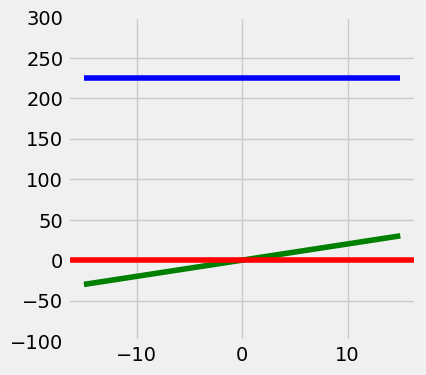

In [41]:
def f(x):
    return x ** 2
    
def df(x):
    return 2*x

def plot(f, df):   
    plt.figure(figsize=(4, 4))
    x = np.array([-15, 15])
    plt.plot(x,f(x),color='blue')
    plt.plot(x,df(x),color='green')
    plt.axhline(0,color='red')
    plt.ylim(-100, 300)

plot(f, df)

### Question 4 (Ungraded) ##

Data science is a rapidly expanding field and no degree program can hope to teach you everything that will be helpful to you as a data scientist. So it's important that you become familiar with looking up documentation and learning how to read it. 

Below is a section of code that plots a three-dimensional "wireframe" plot. You'll see what that means when you draw it. Replace each `# Your answer here` with a description of what the line above does, what the arguments being passed in are, and how the arguments are used in the function. For example,

```
np.arange(2, 5, 0.2)
# This returns an array of numbers from 2 to 5 with an interval size of 0.2
```

**Hint:** The `Shift` + `Tab` tip from earlier in the notebook may help here. Remember that objects must be defined in order for the documentation shortcut to work; for example, all of the documentation will show for method calls from `np` since we've already executed `import numpy as np`. However, since `z` is not yet defined in the kernel, `z.reshape(x.shape)` will not show documentation until you run the line `z = np.cos(squared)`.

<!--
BEGIN QUESTION
name: q4
-->

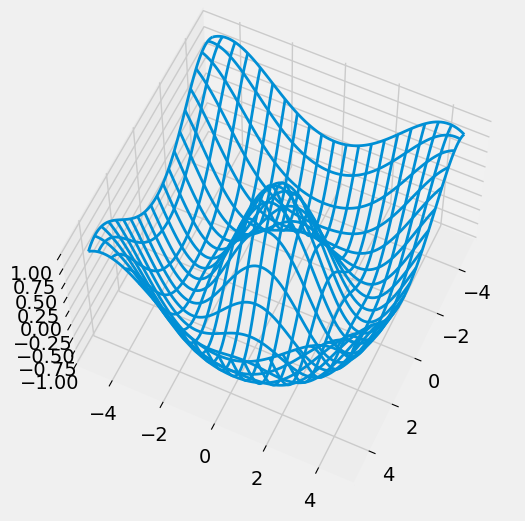

In [42]:
from mpl_toolkits.mplot3d import axes3d

u = np.linspace(1.5 * np.pi, -1.5 * np.pi, 100)
# Your answer here
[x, y] = np.meshgrid(u, u)
# Your answer here
squared = np.sqrt(x.flatten() ** 2 + y.flatten() ** 2)
z = np.cos(squared)
# Your answer here
z = z.reshape(x.shape)
# Your answer here

fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection = '3d')
# Your answer here
ax.plot_wireframe(x, y, z, rstride = 5, cstride = 5, lw = 2)
# Your answer here
ax.view_init(elev = 60, azim = 25)
# Your answer here
plt.savefig("figure1.png")
# Your answer here

### Question 5 (Ungraded)

Do you think that eating french fries with mayonnaise is a crime?  
Tell us what you think in the following Markdown cell. :)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)